This jupyter notebook plots a set of data, adds noise to the data, and then creates a least squares fit model using the pseudo inverse method. 

Linear System ofr equations: 

$A x = b$

Pseudo Inverse of A is as follows: 

$A = \hat{U} \hat{\Sigma} V^{T} \rarr A^{+} = V \Sigma^{-1} U^{T}$ \

Least-Square Fit: 

$\tilde{x} = A^{+} b$



Size of Matrix a: (16,)
Size of Matrix a reshaped: (16, 1)


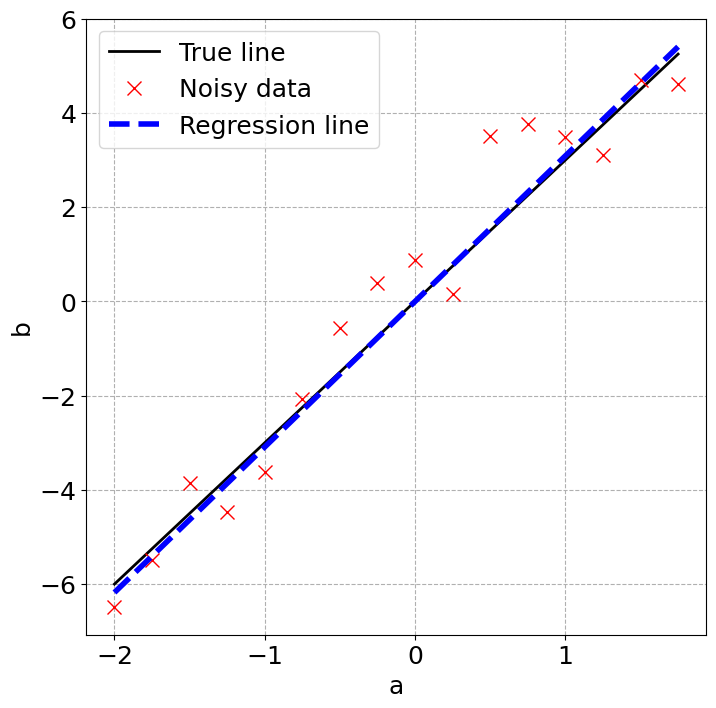

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# True slope
x = 3 

# Create Points from -2 to 2 in increments of 0.25 
a = np.arange(-2,2,0.25)
print("Size of Matrix a: " + str(a.shape))

# Reshape matrix a from (16,) to (16,1)
a = a.reshape(-1, 1)
print("Size of Matrix a reshaped: " + str(a.shape))

# Add noise to Data
b = x*a + np.random.randn(*a.shape) 

# True relationship
plt.plot(a, x*a, color='k', linewidth=2, label='True line') 

# Noisy measurements
plt.plot(a, b, 'x', color='r' , markersize=10, label='Noisy data') 

# Compute SVD
U, S, VT = np.linalg.svd(a,full_matrices=False)

# Least-square fit
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b 
plt.plot(a,xtilde * a,'--',color='b',linewidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

Methods for Computing Regression

In [19]:
# Three methods of computing regression

xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) @ b

# The third method is specific to Matlab:
# xtilde3 = regress(b,a)